In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

#from datetime import datetime

In [60]:
df = pd.read_csv('Train (1).csv')
df.head()
df=df.head(130)
print(df)
dftest = pd.read_csv('Train (1).csv')
dftest = dftest.head(150) 



           Date    Stock  liabilities      equity  total_assets   
0    2006-07-31  Stock 1   625.898686  925.086518   1550.985204  \
1    2006-08-31  Stock 1   407.387467  903.249093   1310.636561   
2    2006-09-29  Stock 1   464.069891  602.668832   1066.738722   
3    2006-10-31  Stock 1   855.854937  391.375369   1247.230306   
4    2006-11-30  Stock 1   453.954969  956.490566   1410.445534   
..          ...      ...          ...         ...           ...   
125  2016-12-30  Stock 1   686.577086  214.185564    900.762650   
126  2017-01-31  Stock 1   905.465559  193.736105   1099.201664   
127  2017-02-28  Stock 1   603.556814  275.926800    879.483614   
128  2017-03-31  Stock 1   710.954003  358.933999   1069.888002   
129  2017-04-28  Stock 1   435.367708  727.841233   1163.208942   

     current_assets  current_liabilities  total_revenue  net_income   
0        675.789905           555.931329     548.488451  251.282553  \
1       1023.110983          1295.186240     513.4464

In [61]:
cols = list(df)[2:12]
print(cols) 


['liabilities', 'equity', 'total_assets', 'current_assets', 'current_liabilities', 'total_revenue', 'net_income', 'dividend', 'shares_outstanding', 'price']


In [62]:
df_for_training = df[cols].astype(float)
df_for_test = dftest[cols].astype(float)
#converts all element to the float

In [63]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
print(df_for_training_scaled)

[[ 0.27028016  1.43679852  1.3117372  ...  1.78592032 -0.31598085
  -2.21157645]
 [-0.59955114  1.35798459  0.63518204 ...  0.84338815 -0.11453547
  -1.96757486]
 [-0.37391446  0.27315384 -0.05136371 ...  0.35682181  1.53044024
  -1.81007558]
 ...
 [ 0.18134349 -0.90609793 -0.57846637 ...  0.04747429  1.32992972
   0.96642584]
 [ 0.60886129 -0.60651484 -0.04249883 ... -0.69046811 -1.04399574
   1.10239633]
 [-0.48816972  0.72491627  0.22018941 ... -0.69046811  0.76094519
   0.95575703]]


In [65]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_test)
df_for_test_scaled = scaler.transform(df_for_test)
print(len(df_for_test_scaled))
print('testX shape == {}.'.format(df_for_test_scaled.shape))

150
testX shape == (150, 10).


In [70]:
trainX = []
trainY = []


In [71]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14 # Number of past days we want to use to predict the future.
print(len(df_for_training_scaled))

130


In [72]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 9])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (116, 14, 10).
trainY shape == (116, 1).


In [73]:


testX = []
testY = []

for i in range(n_past, len(df_for_test_scaled) - n_future + 1):
    testX.append(df_for_test_scaled[i - n_past:i, 0:df_for_test.shape[1]])
    testY.append(df_for_test_scaled[i + n_future - 1:i + n_future, 9])

testX = np.array(testX)
testY = np.array(testY)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))


testX shape == (136, 14, 10).
testY shape == (136, 1).


In [74]:
df_for_training_scaled

array([[ 0.27028016,  1.43679852,  1.3117372 , ...,  1.78592032,
        -0.31598085, -2.21157645],
       [-0.59955114,  1.35798459,  0.63518204, ...,  0.84338815,
        -0.11453547, -1.96757486],
       [-0.37391446,  0.27315384, -0.05136371, ...,  0.35682181,
         1.53044024, -1.81007558],
       ...,
       [ 0.18134349, -0.90609793, -0.57846637, ...,  0.04747429,
         1.32992972,  0.96642584],
       [ 0.60886129, -0.60651484, -0.04249883, ..., -0.69046811,
        -1.04399574,  1.10239633],
       [-0.48816972,  0.72491627,  0.22018941, ..., -0.69046811,
         0.76094519,  0.95575703]])

In [75]:
trainY

array([[-1.15363875],
       [-1.33049726],
       [-1.25218403],
       [-1.33760816],
       [-1.37706282],
       [-1.28828044],
       [-1.15050667],
       [-1.22754209],
       [-1.39872958],
       [-1.60214929],
       [-1.54072994],
       [-1.47891168],
       [-1.39248327],
       [-1.34812906],
       [-1.30209751],
       [-1.25192988],
       [-1.03863541],
       [-0.99879059],
       [-0.83210327],
       [-0.64660612],
       [-0.36746069],
       [-0.35016177],
       [-0.40908633],
       [-0.52589349],
       [-0.66224659],
       [-0.62575141],
       [-0.5980083 ],
       [-0.49645166],
       [-0.45252555],
       [-0.48369848],
       [-0.37998509],
       [-0.44988033],
       [-0.39628611],
       [-0.21522121],
       [-0.15040413],
       [-0.14678591],
       [-0.08118155],
       [ 0.03822669],
       [-0.17481687],
       [-0.19811918],
       [-0.09763132],
       [-0.0091049 ],
       [ 0.05409046],
       [ 0.15841897],
       [ 0.09034218],
       [-0

In [76]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True)) 
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 14, 64)            19200     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 31,649
Trainable params: 31,649
Non-trainable params: 0
_________________________________________________________________


In [77]:
history = model.fit(trainX, trainY, epochs=5, batch_size=3, validation_split=0.1, verbose=1)

Epoch 1/5
35/35 [==============================] - 6s 35ms/step - loss: 0.3809 - val_loss: 0.0270
Epoch 2/5
35/35 [==============================] - 1s 19ms/step - loss: 0.1351 - val_loss: 0.0343
Epoch 3/5
35/35 [==============================] - 0s 13ms/step - loss: 0.0814 - val_loss: 0.0712
Epoch 4/5
35/35 [==============================] - 1s 18ms/step - loss: 0.0712 - val_loss: 0.0037
Epoch 5/5
35/35 [==============================] - 1s 18ms/step - loss: 0.0620 - val_loss: 0.0064


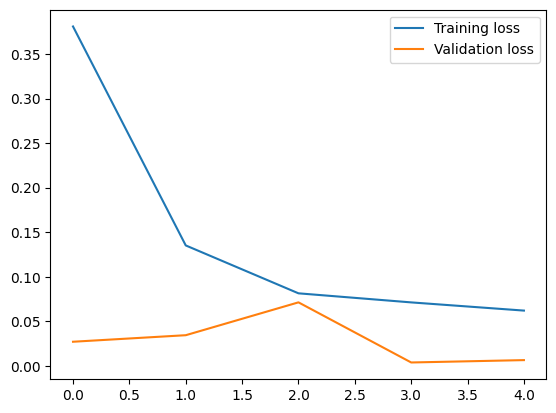

In [78]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [79]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [80]:


train_dates = pd.to_datetime(dftest['Date'])
print(train_dates.tail(20)) 

130   2017-05-31
131   2017-06-30
132   2017-07-31
133   2017-08-31
134   2017-09-29
135   2017-10-31
136   2017-11-30
137   2017-12-29
138   2018-01-31
139   2018-02-28
140   2018-03-30
141   2018-04-30
142   2018-05-31
143   2018-06-29
144   2018-07-31
145   2018-08-31
146   2018-09-28
147   2018-10-31
148   2018-11-30
149   2018-12-31
Name: Date, dtype: datetime64[ns]


In [81]:
prediction = model.predict(testX[-20:]) 

1/1 [==============================] - 1s 546ms/step


In [82]:
prediction_copies = np.repeat(prediction, df_for_test_scaled.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,9]
print(y_pred_future)

[124.19713  124.27002  124.03698  124.07766  123.99227  124.05002
 124.096306 123.86514  123.7244   123.79476  123.8999   124.19294
 124.026024 123.606255 123.249176 123.19023  123.09395  122.98985
 122.81643  122.594444]


In [84]:
dftest1 = dftest.tail(20)
forecast_dates = dftest1['Date'].tolist()
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'price':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [85]:
original = df[['Date', 'price']]
original['Date']=pd.to_datetime(original['Date'])
original

C:\Users\hp\AppData\Local\Temp\ipykernel_3604\1150982956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


,Date,price
0,2006-07-31,100.000000
1,2006-08-31,101.924169
2,2006-09-29,103.166191
3,2006-10-31,104.478956
4,2006-11-30,104.160907
...,...,...
125,2016-12-30,125.115552
126,2017-01-31,124.302813
127,2017-02-28,125.061373
128,2017-03-31,126.133621


In [86]:
df_forecast

,Date,price
0,2017-05-31,124.197128
1,2017-06-30,124.270020
2,2017-07-31,124.036980
3,2017-08-31,124.077660
4,2017-09-29,123.992271
5,2017-10-31,124.050018
6,2017-11-30,124.096306
7,2017-12-29,123.865143
8,2018-01-31,123.724403
9,2018-02-28,123.794762


<Axes: xlabel='Date'>

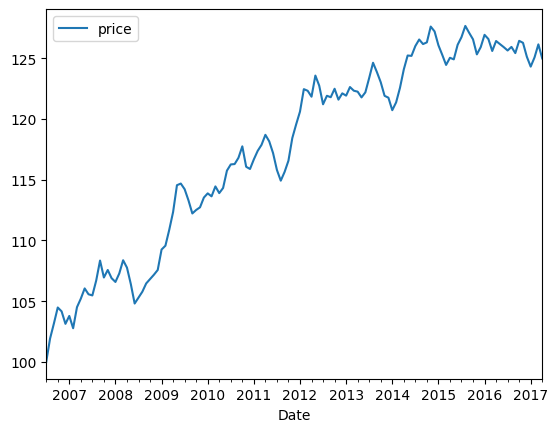

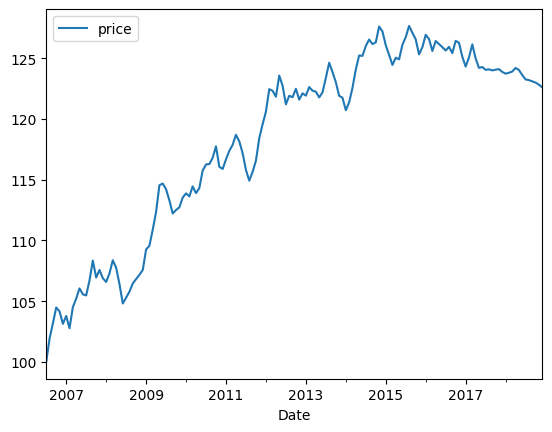

In [87]:
original.plot(x='Date',y='price')
original= pd.concat([original,df_forecast],axis=0)
original.plot(x='Date',y='price')
#f_forecast.plot(x='Date',y='price')

In [96]:

y_true = dftest1['price']
print(y_true)

130    122.951050
131    122.938915
132    123.260215
133    122.959089
134    122.390991
135    121.565300
136    123.191378
137    123.154387
138    122.562211
139    123.719922
140    125.547720
141    125.070057
142    123.587449
143    123.373934
144    122.508423
145    120.895608
146    120.817216
147    121.541253
148    120.380297
149    119.687371
Name: price, dtype: float64


In [97]:
dates = dftest1['Date']
    
df_real = pd.DataFrame({'Date':np.array(dates), 'price':y_true})


In [98]:
df_real

,Date,price
130,2017-05-31,122.951050
131,2017-06-30,122.938915
132,2017-07-31,123.260215
133,2017-08-31,122.959089
134,2017-09-29,122.390991
135,2017-10-31,121.565300
136,2017-11-30,123.191378
137,2017-12-29,123.154387
138,2018-01-31,122.562211
139,2018-02-28,123.719922


In [99]:
def directional_accuracy(y_true, y_pred):
    y_true_direction = np.sign(np.diff(y_true))
    y_pred_direction = np.sign(np.diff(y_pred))
    da = np.mean(y_true_direction == y_pred_direction)
    return da
directional_accuracy(y_true ,y_pred_future )

0.6842105263157895

In [100]:
def mape(y_true , y_pred ):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    error = np.abs((y_true - y_pred) / y_true)
    mape = np.mean(error) * 100
    
    return mape

In [101]:
print(mape(y_true ,y_pred_future ))

1.094867536565121
